In [194]:
# Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d

# Visualization parameter
plt.rcParams['figure.figsize'] = [10,6]

import random
import time

### Function Implementation
The Schwefel function is a continuous, multimodal, non-convex, deceptive (many local optima), and N-dimensional function with a global minimum of 0.

> $f_{schwefel}(x_1, x_2, ... x_N) = 418.98291 N - \sum_{i=1}^N x_i sin(\sqrt {|x_i|})$

It takes in N random numbers in a pre-defined range, processes them through the formula above, and returns a value. For example, if $N = 2$, we might randomly generate numbers $x_1 = 0$ and $x_2 = 0$, plug them into the Schwefel function, and get a value of 837.96582.

### Genetic Algorithm Goal
The goal of this project is to build a Genetic Algorithm such that, for some given number range for N random numbers, we can find a combination of N numbers to yield a value of 0 or close to 0 when inputted into our Schwefel function.

In [195]:
def schwefel(num_list):  
    return (418.98291*len(num_list)) - np.sum([x*np.sin(np.sqrt(np.absolute(x)))for x in num_list])

In [196]:
schwefel([0,0])

837.96582

Due to floating point errors, we can't *really* hit 0 consistently as `np.sin(np.pi)` yields $1.22\times10^{-16}$ where it should be 0. The value is, however, small enough to be negligible in the grand scheme of things, though.

In [197]:
schwefel([420.969 for i in range(10)])

0.00022735684069630224

Note, with a little bit of math, you can quickly find one of the solutions as all of the numbers you input into the Schwefel function is arbitrary. You can practically solve it by graphing these two equations on Desmos or whatever graphing calculator software you have.
> $y = 418.98291$

> $y = sin(\sqrt {|x_i|})$

### Quick Visualization
We can plot the full extent of the Schwefel function's range for $N = 2$ by plotting the Schwefel function value of every combination of those two numbers onto a third axis to make a 3-Dimensional visualization of the Schwefel fitness landscape.

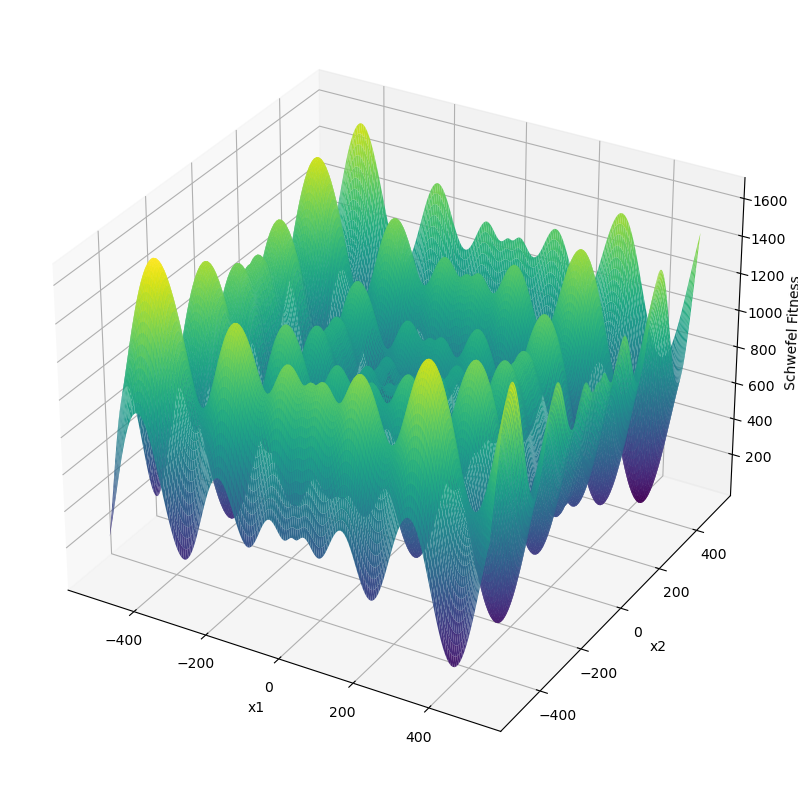

In [198]:
# Visualization of 2-Dimensional Schwefel function (3-D Fitness landscape visualization)
# Schwefel function modified for graphing convenience
def schwefel2(x, y):  
    return (418.98291*2) - ((x*np.sin(np.sqrt(np.absolute(x))))+(y*np.sin(np.sqrt(np.absolute(y)))))

x1 = np.linspace(-512, 512, 200)
x2 = np.linspace(-512, 512, 200)

X1, X2 = np.meshgrid(x1, x2)
results = schwefel2(X1, X2)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, results, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Schwefel Fitness')
plt.show()

## Real-Valued GA Approach
- Representation and Population: 100 randomly generated lists of 10 real numbers.
- Parents selected via Tournament Selection (n=2)
- Crossover (Pc = 0.9): Uniform, Whole Arithmetic
- Mutation (Pm = 1/10 = 0.1): Uniform
- Survivor Selection: Top 100 of Parents+Offspring pool
- Run for 500 generations and see how close we get.

In [199]:
# Population Init for 100 randomly generated genotypes
population = [[random.uniform(-512, 512) for i in range(10)] for i in range(100)]

# This line sorts our population by the values of its schwefel fitness value
population.sort(key=schwefel)
# Access scores via [schwefel(i) for i in population]

In [200]:
# Mutation Operator - Mutating each number in a chromosome by randomly selecting another number in range

# Toggle parameters here
mrate = 0.1 # Per bit

# Takes in one chromosome and mutates each gene
def mutate(geno):
    return [random.uniform(-512, 512) if(random.uniform(0,1)<=mrate) else i for i in geno]
# Mutate with [mutate(i) for i in population]

In [201]:
# Crossover Operator - Taking 2 chromosomes and doing uniform whole arithmetic recombination

# Uniform, so crossover parameter is 0.5. Takes equal influence from both parents, returns identical children
alpha = 0.5
xrate = 0.9 # Per crossover operation, else copy parents

# Takes in two chromosomes and returns two new chromosomes
def cross(geno1, geno2):
    if(random.uniform(0,1)<=xrate):
        child1 = [alpha*geno1[i]+(1-alpha)*geno2[i] for i in range(len(geno1))]
        child2 = [alpha*geno2[i]+(1-alpha)*geno1[i] for i in range(len(geno2))]
        return [child1, child2]
    return [geno1, geno2]
# Add to population with population+cross(a,b)

In [202]:
# Parent Selector - Tournament selection. Tournament participants are uniformly random, selection grabs top fitness
# Contestants picked without replacement, n = tournament size, replaced after tournament
n = 2

def parent_sel(population):
    # Cumulative sum of ranking probabilities used here for random choice selection
    
    parents = []
    
    # Repeat process twice to get 2 parents for reproduction
    for i in range(2):
        # Set up copy for easier management
        copy_pool = population.copy()
        
        # Pick n contestants without replacement and sort by fitness    
        tourn_pool = [copy_pool.pop(random.randint(0, len(copy_pool)-1)) for i in range(n)]
        tourn_pool.sort(key=schwefel)
        # Just grab the best
        parents = parents+[tourn_pool[0]]

    return parents
# Have crossover call with cross(*parents)

In [203]:
# Survival Selector - Parents and Offsprings competing together
psize = 100

# Deterministic selection: Just picks Top 100 by dropping the worst (highest fitness) instead of sorting the list
def det_surv(pop):
    pop.sort(key=schwefel)
    return pop[:psize]

In [204]:
# ONE TRIAL

start_time = time.time()

# Initialize population
population = [[random.uniform(-512, 512) for i in range(10)] for i in range(100)]

for i in range(500):
    # Make 100 Kids
    for i in range(50):
        # Parent Selection
        parents = parent_sel(population)

        # Variation Operators on Offspring
        children = cross(*parents)
        children = [mutate(i) for i in children]
        population = population+children

    # Survival Selection
    population = det_surv(population)
print("--- %s seconds ---" % (time.time() - start_time))
print(f"Best Chromosome: {min(population, key=schwefel)}")

--- 6.752682685852051 seconds ---
Best Chromosome: [421.5634757106459, 421.2582302609291, 422.24946100873376, 420.20887845506604, 421.04049739275627, 420.26887772844543, 421.0916710342302, 420.7232304007641, 421.28450261839583, 421.66383352205435]


In [205]:
data = []
start_time = time.time()

for trial in range(30):
    # Initialize population
    population = [[random.uniform(-512, 512) for i in range(10)] for i in range(100)]

    # Keep track of both fitness over time and best performer overtime
    # Doing range(501) here because we're also counting its initial performance
    f_progress = [min([schwefel(i) for i in population])]
    
    for i in range(500):
        # Make 100 Kids
        for i in range(50):
            # Parent Selection
            parents = parent_sel(population)

            # Variation Operators
            children = cross(*parents)
            children = [mutate(i) for i in children]
            population = population+children

        # Survival Selection
        population = det_surv(population)
        f_progress.append(min([schwefel(i) for i in population]))
    data.append(f_progress)
print("--- %s seconds ---" % (time.time() - start_time))

--- 239.18499374389648 seconds ---


In [206]:
data_df = pd.DataFrame(data)
data_df.index += 1
data_df.index.name = "Trial Number"
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
Trial Number,,,,,,,,,,,,,,,,,,,,,
1,2620.458162,2620.458162,2620.458162,2620.458162,2620.458162,2620.458162,2620.458162,2435.395060,2435.395060,2435.395060,...,0.425576,0.425576,0.425369,0.425369,0.425338,0.425338,0.425338,0.425184,0.425140,0.425140
2,2769.379054,2653.607060,2653.607060,2653.607060,2653.607060,2653.607060,2616.471736,2616.471736,2616.471736,2616.471736,...,0.432740,0.432740,0.432740,0.432740,0.432740,0.432740,0.432740,0.432740,0.432740,0.432740
3,2205.518619,2205.518619,2205.518619,2205.518619,2205.518619,2190.126913,2190.126913,1777.069663,1777.069663,1777.069663,...,1.069164,1.069164,1.069164,1.069164,1.069164,1.069164,1.069164,1.069164,1.069164,1.069164
4,2646.342371,2162.489017,2162.489017,2162.489017,2162.489017,2162.489017,2162.489017,2162.489017,2054.676703,2054.676703,...,0.937152,0.937152,0.937152,0.937152,0.753361,0.753361,0.753361,0.753361,0.753361,0.753361
5,2410.888549,2410.888549,2410.888549,2410.888549,2410.888549,2410.888549,2410.888549,2410.888549,2410.888549,2410.888549,...,1.927625,1.809724,1.809724,1.809724,1.809724,1.809724,1.801699,1.801699,1.801699,1.801699


In [207]:
average_df = data_df.mean(axis=0).to_frame(name="Average Fitness each Generation")
print(f"Hits Schwefel < 10 at Generation {average_df[average_df['Average Fitness each Generation']<10].iloc[0].name}")

Hits Schwefel < 10 at Generation 271


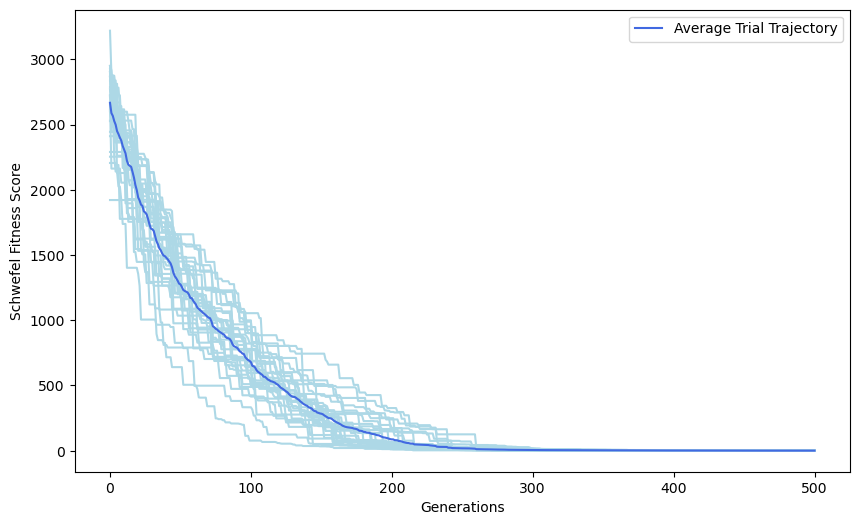

In [208]:
for i in range(30):
    data_df.iloc[i].plot(color="lightblue", label="_nolegend_")
data_df.mean(axis=0).plot(color="royalblue", label="Average Trial Trajectory")
plt.ylabel("Schwefel Fitness Score")
plt.xlabel("Generations")
plt.legend()
plt.show()

On average, Genetic Algorithm with a Tournament Size of 2 reaches Schwefel < 10 at Generation 280
--- 229.27513790130615 seconds ---
On average, Genetic Algorithm with a Tournament Size of 6 reaches Schwefel < 10 at Generation 114
--- 403.1565155982971 seconds ---
On average, Genetic Algorithm with a Tournament Size of 10 reaches Schwefel < 10 at Generation 85
--- 572.0585677623749 seconds ---
On average, Genetic Algorithm with a Tournament Size of 15 reaches Schwefel < 10 at Generation 70
--- 776.164479970932 seconds ---
On average, Genetic Algorithm with a Tournament Size of 20 reaches Schwefel < 10 at Generation 56
--- 1004.419595003128 seconds ---


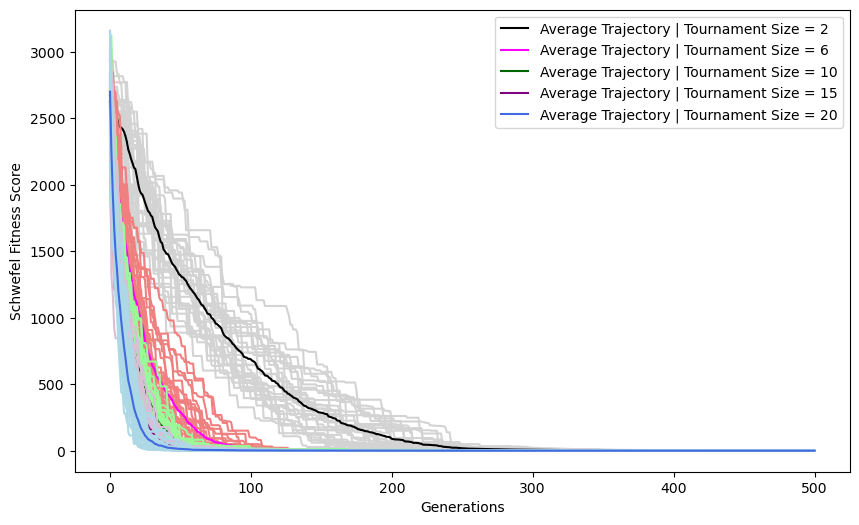

In [214]:
# This time, with varying Tournament Sizes
tsizes=[2, 6, 10, 15, 20]
color=[["lightgrey", "black"], ["lightcoral", "magenta"], ["palegreen", "darkgreen"], ["thistle", "purple"], ["lightblue", "royalblue"]]

# Test different conditions
for test in range(5):
    # Each Test Bundle
    start_time = time.time()
    n = tsizes[test]
    data = []
    for trial in range(30):
        # Initialize population
        population = [[random.uniform(-512, 512) for i in range(10)] for i in range(100)]

        # Keep track of both fitness over time and best performer overtime
        # Doing range(501) here because we're also counting its initial performance
        f_progress = [min([schwefel(i) for i in population])]

        for i in range(500):
            # Make 100 Kids
            for i in range(50):
                # Parent Selection
                parents = parent_sel(population)

                # Variation Operators
                children = cross(*parents)
                children = [mutate(i) for i in children]
                population = population+children

            # Survival Selection
            population = det_surv(population)
            f_progress.append(min([schwefel(i) for i in population]))
        data.append(f_progress)
    # Plot Results of each Test Bundle
    data_df = pd.DataFrame(data)
    average_df = data_df.mean(axis=0).to_frame(name="Average Fitness each Generation")
    print(f"On average, Genetic Algorithm with a Tournament Size of {n} reaches Schwefel < 10 at Generation {average_df[average_df['Average Fitness each Generation']<10].iloc[0].name}")
    print("--- %s seconds ---" % (time.time() - start_time))
    for i in range(30):
        data_df.iloc[i].plot(color=color[test][0], label="_nolegend_")
    data_df.mean(axis=0).plot(color=color[test][1], label=f"Average Trajectory | Tournament Size = {n}")

plt.ylabel("Schwefel Fitness Score")
plt.xlabel("Generations")
plt.legend()
plt.show()


# Reset parameters
n=2

On average, Genetic Algorithm with a Crossover Rate of 0.2 reaches Schwefel < 10 at Generation 148
--- 223.3997826576233 seconds ---
On average, Genetic Algorithm with a Crossover Rate of 0.4 reaches Schwefel < 10 at Generation 166
--- 225.44830203056335 seconds ---
On average, Genetic Algorithm with a Crossover Rate of 0.6 reaches Schwefel < 10 at Generation 188
--- 222.64057874679565 seconds ---
On average, Genetic Algorithm with a Crossover Rate of 0.9 reaches Schwefel < 10 at Generation 286
--- 223.9570369720459 seconds ---
On average, Genetic Algorithm with a Crossover Rate of 1.0 reaches Schwefel < 10 at Generation 436
--- 226.08642721176147 seconds ---


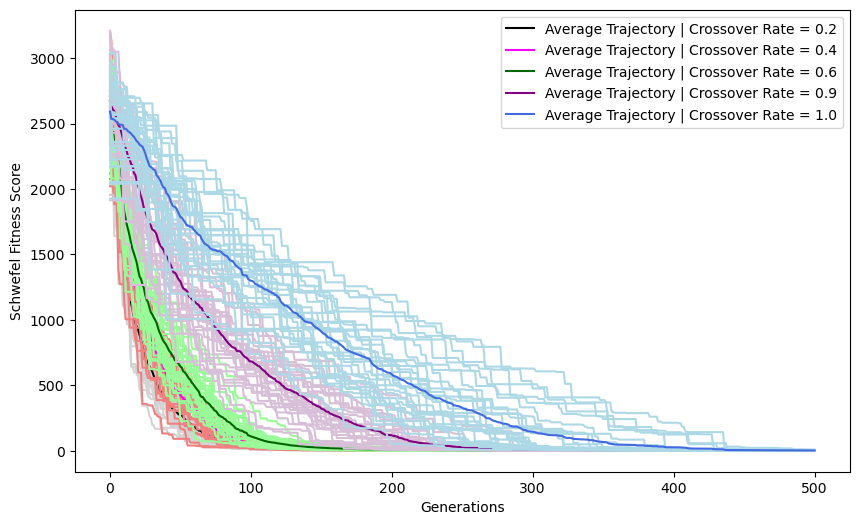

In [215]:
# This time, with varying Crossover Rates
tsizes=[0.2, 0.4, 0.6, 0.9, 1.0]
color=[["lightgrey", "black"], ["lightcoral", "magenta"], ["palegreen", "darkgreen"], ["thistle", "purple"], ["lightblue", "royalblue"]]

# Test different conditions
for test in range(5):
    # Each Test Bundle
    start_time = time.time()
    xrate = tsizes[test]
    data = []
    for trial in range(30):
        # Initialize population
        population = [[random.uniform(-512, 512) for i in range(10)] for i in range(100)]

        # Keep track of both fitness over time and best performer overtime
        # Doing range(501) here because we're also counting its initial performance
        f_progress = [min([schwefel(i) for i in population])]

        for i in range(500):
            # Make 100 Kids
            for i in range(50):
                # Parent Selection
                parents = parent_sel(population)

                # Variation Operators
                children = cross(*parents)
                children = [mutate(i) for i in children]
                population = population+children

            # Survival Selection
            population = det_surv(population)
            f_progress.append(min([schwefel(i) for i in population]))
        data.append(f_progress)
    # Plot Results of each Test Bundle
    data_df = pd.DataFrame(data)
    average_df = data_df.mean(axis=0).to_frame(name="Average Fitness each Generation")
    print(f"On average, Genetic Algorithm with a Crossover Rate of {xrate} reaches Schwefel < 10 at Generation {average_df[average_df['Average Fitness each Generation']<10].iloc[0].name}")
    print("--- %s seconds ---" % (time.time() - start_time))
    for i in range(30):
        data_df.iloc[i].plot(color=color[test][0], label="_nolegend_")
    data_df.mean(axis=0).plot(color=color[test][1], label=f"Average Trajectory | Crossover Rate = {xrate}")

plt.ylabel("Schwefel Fitness Score")
plt.xlabel("Generations")
plt.legend()
plt.show()

# Reset parameters
xrate=0.9

On average, Genetic Algorithm with a Mutation Rate of 0.0 did not converge towards the Global Optimum
--- 227.28430199623108 seconds ---
On average, Genetic Algorithm with a Mutation Rate of 0.1 reaches Schwefel < 10 at Generation 288
--- 225.1129777431488 seconds ---
On average, Genetic Algorithm with a Mutation Rate of 0.3 did not converge towards the Global Optimum
--- 228.6448233127594 seconds ---
On average, Genetic Algorithm with a Mutation Rate of 0.5 did not converge towards the Global Optimum
--- 228.53138971328735 seconds ---
On average, Genetic Algorithm with a Mutation Rate of 0.7 did not converge towards the Global Optimum
--- 232.41887497901917 seconds ---


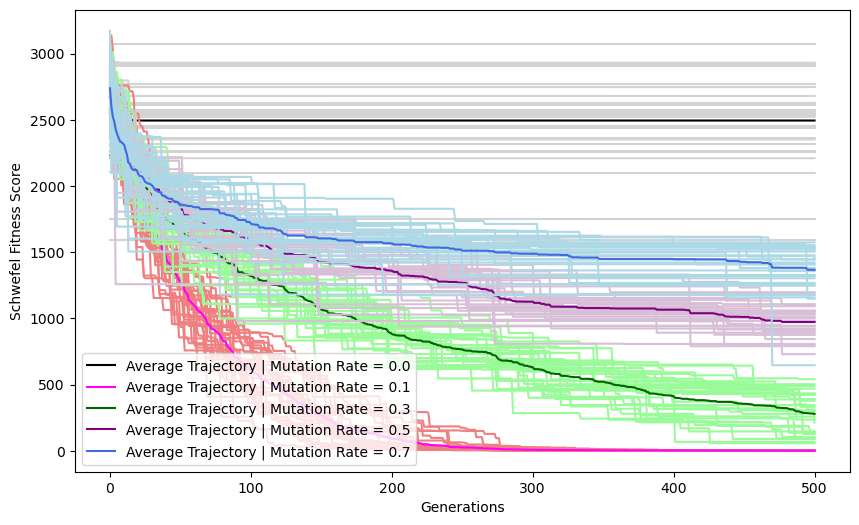

In [223]:
# This time, with varying Mutation Rates
tsizes=[0.0, 0.1, 0.3, 0.5, 0.7]
color=[["lightgrey", "black"], ["lightcoral", "magenta"], ["palegreen", "darkgreen"], ["thistle", "purple"], ["lightblue", "royalblue"]]

# Test different conditions
for test in range(5):
    # Each Test Bundle
    start_time = time.time()
    mrate = tsizes[test]
    data = []
    for trial in range(30):
        # Initialize population
        population = [[random.uniform(-512, 512) for i in range(10)] for i in range(100)]

        # Keep track of both fitness over time and best performer overtime
        # Doing range(501) here because we're also counting its initial performance
        f_progress = [min([schwefel(i) for i in population])]

        for i in range(500):
            # Make 100 Kids
            for i in range(50):
                # Parent Selection
                parents = parent_sel(population)

                # Variation Operators
                children = cross(*parents)
                children = [mutate(i) for i in children]
                population = population+children

            # Survival Selection
            population = det_surv(population)
            f_progress.append(min([schwefel(i) for i in population]))
        data.append(f_progress)
    # Plot Results of each Test Bundle
    data_df = pd.DataFrame(data)
    average_df = data_df.mean(axis=0).to_frame(name="Average Fitness each Generation")
    if (len(average_df[average_df['Average Fitness each Generation']<10])>0):
        print(f"On average, Genetic Algorithm with a Mutation Rate of {mrate} reaches Schwefel < 10 at Generation {average_df[average_df['Average Fitness each Generation']<10].iloc[0].name}")
    else:
        print(f"On average, Genetic Algorithm with a Mutation Rate of {mrate} did not converge towards the Global Optimum")
    print("--- %s seconds ---" % (time.time() - start_time))
    for i in range(30):
        data_df.iloc[i].plot(color=color[test][0], label="_nolegend_")
    data_df.mean(axis=0).plot(color=color[test][1], label=f"Average Trajectory | Mutation Rate = {mrate}")

plt.ylabel("Schwefel Fitness Score")
plt.xlabel("Generations")
plt.legend()
plt.show()

# Reset parameters
mrate=0.1

## Binary GA Approach
- Representation and Population: 100 randomly generated lists of 10 binary numbers.
- Parents selected via Tournament Selection (n=2)
- Crossover (Pc = 0.9): Uniform, 2-Point
- Mutation (Pm = 1/100 = 0.01): Bit-flip
- Survivor Selection: Parents+Offspring
- Run for 500 generations and see how close we get.

In [15]:
# TODO: Pop init, cross, mutate, parent sel, survivor sel, terminate

In [14]:
a = '-'+''.join(str(random.randint(0, 1)) for i in range(9))

In [15]:
a
# [0,1,0 x 100] kinda just brute force 100 bits and convert to Ints

'-000001100'

In [19]:
a = 0b1111111111
str(a)

'1023'